Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
#This is done so that to add plots in our notebook

Importing Data

In [ ]:
HouseDF = pd.read_csv('melb_data.csv')

In [ ]:
HouseDF

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


### Data Exploration

In [ ]:
HouseDF.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
HouseDF.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
HouseDF.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Preparing the Data

In [ ]:
HouseDF.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
# drop missing value
HouseDF.dropna(inplace = True)

In [ ]:
HouseDF.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

One hot encoding

In [ ]:
df_encod = HouseDF.copy()

object_features=df_encod.select_dtypes(include="object").columns.tolist()

print("total object data type features:",len(object_features))

print("Features \n",object_features)

total object data type features: 8
Features 
 ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [ ]:
df_encod[object_features].head(2)

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan


In [ ]:
print("shape of DF before encoding : ",df_encod.shape)
df_encod=pd.get_dummies(df_encod,columns=object_features,prefix=object_features,drop_first=True)
print("shape of DF after encoding : ",df_encod.shape)


shape of DF before encoding :  (6196, 21)
shape of DF after encoding :  (6196, 6710)


In [ ]:
df_encod.head(2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,0,1,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,0,1,0,0,1,0,0,0,0,0


C:\Users\Sony\AppData\Local\Temp\ipykernel_12100\88291756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encod['Price'])


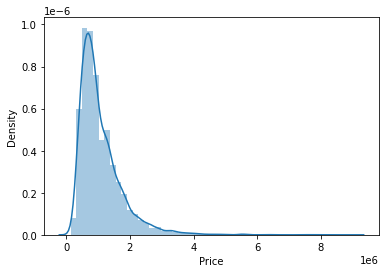

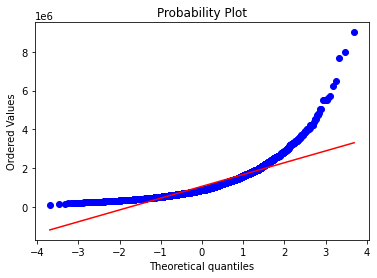

In [ ]:
from scipy import stats
sns.distplot(df_encod['Price'])
fig = plt.figure()
prob = stats.probplot(df_encod["Price"], plot=plt)

C:\Users\Sony\AppData\Local\Temp\ipykernel_12100\4285129832.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist_price = sns.distplot(df_encod["LogPrice"])


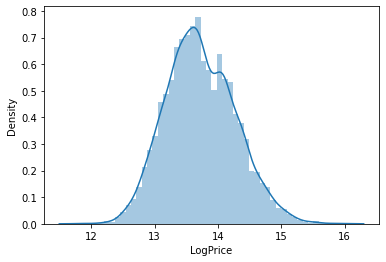

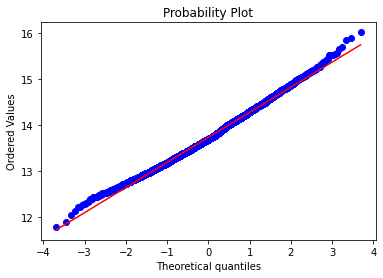

In [ ]:
# Since the probability Plot looks like a log distribution , so now we can use np.log to transform it
df_encod["LogPrice"] = np.log(df_encod["Price"])
dist_price = sns.distplot(df_encod["LogPrice"])
fig = plt.figure()
prob_log = stats.probplot(df_encod["LogPrice"], plot=plt)
plt.show()

In [ ]:
corr = HouseDF.corr()

<AxesSubplot:>

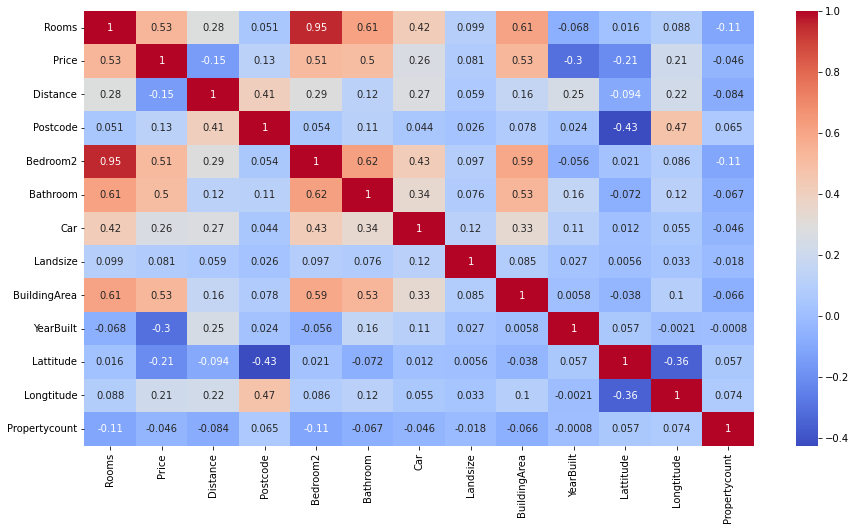

In [ ]:

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
X = df_encod.drop(['Price','LogPrice'],axis=1)

In [ ]:
y = df_encod['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Standarisation of data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
print(scaler.fit(X_train))

StandardScaler()


In [ ]:
X_train=scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
print(lr.intercept_)

1075584.1046542842


In [ ]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])

In [ ]:
coeff_df

,Coefficient
Rooms,62045.781831
Distance,-41434.535726
Postcode,6792.237575
Bedroom2,62548.472296
Bathroom,75028.334604
...,...
Regionname_Northern Victoria,-4090.265980
Regionname_South-Eastern Metropolitan,-6661.998359
Regionname_Southern Metropolitan,37951.388463
Regionname_Western Metropolitan,-18630.687061


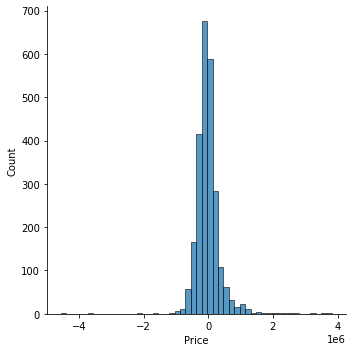

In [ ]:
sns.displot((y_test-lr_pred),bins=50)

In [ ]:
training_score = lr.score(X_train, y_train)
testing_score = lr.score(X_test, y_test)

In [ ]:
print(f"Model: Linear Regression")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Linear Regression
Training Score: 1.0
Testing Score: 0.6266073009427093


In [ ]:
from sklearn import metrics
lr_mae = metrics.mean_absolute_error(y_test, lr_pred)
lr_mse = metrics.mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, lr_pred))
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('R2_score',metrics.r2_score(y_test,lr_pred))

MAE: 246552.61869038877
MSE: 157640082079.1016
R2_score 0.6266073009427093


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train , y_train)

DecisionTreeRegressor()

In [ ]:
training_score = dtree.score(X_train, y_train)
testing_score = dtree.score(X_test, y_test)

In [ ]:
print(f"Model: Decision Tree")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Decision Tree
Training Score: 1.0
Testing Score: 0.5555600583900973


In [ ]:
training_data_prediction = dtree.predict(X_train)

In [ ]:
dtree_pred = dtree.predict(X_test)

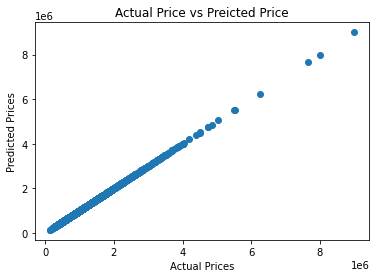

In [ ]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [ ]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  1.0
Mean Absolute Error :  0.0


In [ ]:
dtree_mae = metrics.mean_absolute_error(y_test,dtree_pred)
dtree_mse = metrics.mean_squared_error(y_test,dtree_pred)
dtree_r2 = metrics.r2_score(y_test,dtree_pred)

In [ ]:
print("MAE of decision tree model:" ,dtree_mae)
print("MSE of decision tree model",dtree_mse)
print("R2 score of decision tree model" , dtree_r2)

MAE of decision tree model: 237260.40056474385
MSE of decision tree model 187635026211.01453
R2 score of decision tree model 0.5555600583900973


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=20)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
training_score = knn.score(X_train, y_train)
testing_score = knn.score(X_test, y_test)

In [ ]:
print(f"Model: KNN")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: KNN
Training Score: 0.06417601572783826
Testing Score: -0.08767588364669687


In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
knn_mae = metrics.mean_absolute_error(y_test,knn_pred)
knn_mse = metrics.mean_squared_error(y_test,knn_pred)
knn_r2 = metrics.r2_score(y_test,knn_pred)

In [ ]:
print("MAE of KNN tree model:" ,knn_mae)
print("MSE of KNN tree model",knn_mse)
print("R2 score of KNN tree model" , knn_r2)

MAE of KNN tree model: 551787.8553448971
MSE of KNN tree model 459198361420.60425
R2 score of KNN tree model -0.08767588364669687


### SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

In [ ]:
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train,y_train)

SVR()

In [ ]:
svm_reg.score(X_test,y_test)

-0.07562023218237668

In [ ]:
training_score = svm_reg.score(X_train, y_train)
testing_score = svm_reg.score(X_test, y_test)

In [ ]:
print(f"Model: SVM")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: SVM
Training Score: -0.08001615983546428
Testing Score: -0.07562023218237668


In [ ]:
svm_reg_pred = svm_reg.predict(X_test)

In [ ]:
svm_mae = metrics.mean_absolute_error(y_test,svm_reg_pred)
svm_mse = metrics.mean_squared_error(y_test,svm_reg_pred)
svm_r2 = metrics.r2_score(y_test,svm_reg_pred)

In [ ]:
print("MAE of SVM model:",svm_mae)
print("MSE of SVM model:",svm_mse)
print("R2 Score of SVM model : ",svm_r2)

MAE of SVM model: 444162.57558421657
MSE of SVM model: 454108669278.389
R2 Score of SVM model :  -0.07562023218237668


### Predicting Prices

In [ ]:
y_pred = lr.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
8979,8.616668e+05,905000.0
1498,1.253201e+06,1100000.0
10134,1.607717e+06,1655000.0
7867,7.479998e+05,885000.0
4620,7.404563e+05,741000.0
...,...,...
5639,7.647054e+05,310000.0
8399,6.586276e+05,482000.0
4566,9.010332e+05,1260500.0
5498,9.940345e+05,965000.0


In [ ]:
y_pred = dtree.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})


,Prediction,Actual
8979,998000.0,905000.0
1498,1085000.0,1100000.0
10134,2538000.0,1655000.0
7867,690500.0,885000.0
4620,716000.0,741000.0
...,...,...
5639,400000.0,310000.0
8399,430000.0,482000.0
4566,1100000.0,1260500.0
5498,801000.0,965000.0


In [ ]:
y_pred = knn.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})


,Prediction,Actual
8979,1452200.0,905000.0
1498,1464200.0,1100000.0
10134,1559700.0,1655000.0
7867,1107500.0,885000.0
4620,1300450.0,741000.0
...,...,...
5639,1452200.0,310000.0
8399,1359200.0,482000.0
4566,1464200.0,1260500.0
5498,1208000.0,965000.0


In [ ]:
y_pred = svm_reg.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})


,Prediction,Actual
8979,880015.957738,905000.0
1498,880017.920186,1100000.0
10134,880020.253152,1655000.0
7867,880015.367319,885000.0
4620,880015.233609,741000.0
...,...,...
5639,880015.426511,310000.0
8399,880015.326518,482000.0
4566,880016.597560,1260500.0
5498,880016.072772,965000.0
